In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/raghu11188/Documents/upgrad_content/ml-1/bikeshare_assignment/dataset.csv")

### DATA PREPARATION

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data = data.drop(['instant', 'dteday'], axis=1)

In [7]:
data.sample()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
168,2,0,6,0,6,0,1,28.563347,32.1977,67.0417,8.000336,1807,3312,5119


### CATEGORICAL VARIABLES

In [8]:
season_dummy = pd.get_dummies(data['season'], dtype='int')
season_dummy.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [9]:
season_dummy = season_dummy.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = False)
season_dummy.head()

,spring,summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [10]:
data = pd.concat((data, season_dummy), axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,fall,winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0


In [11]:
#since we have parsed the categorical variable season, we do not need the column anymore
data = data.drop('season', axis=1)

#when summer, fall and winter are all 0, it automatically means it is spring = 1. so we can drop spring
data = data.drop('spring', axis = 1)

data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [12]:
month_d = pd.get_dummies(data['mnth'], dtype='int')
month_d.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [13]:
month_d = month_d.rename(columns={ 1:'Jan',2:'Feb',3:'March',4:'April',5:'May', 6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
month_d.sample(10)

,Jan,Feb,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
570,0,0,0,0,0,0,1,0,0,0,0,0
60,0,0,1,0,0,0,0,0,0,0,0,0
509,0,0,0,0,1,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,0,0
543,0,0,0,0,0,1,0,0,0,0,0,0
120,0,0,0,0,1,0,0,0,0,0,0,0
486,0,0,0,0,1,0,0,0,0,0,0,0
726,0,0,0,0,0,0,0,0,0,0,0,1
266,0,0,0,0,0,0,0,0,1,0,0,0
550,0,0,0,0,0,0,1,0,0,0,0,0


In [14]:
data = pd.concat((data, month_d), axis=1)


#since we have parsed the categorical variable mnth, we do not need the column anymore
data = data.drop('mnth', axis=1)

#when all the other months are zero, it automatically means Jan is 1. So let us drop the jan column
data = data.drop('Jan', axis = 1)

data.sample(5)

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
535,1,0,3,1,1,32.082500,36.04875,59.2083,7.625404,872,...,0,0,0,1,0,0,0,0,0,0
122,0,0,2,1,2,25.283347,29.10395,69.7083,22.958689,603,...,0,0,1,0,0,0,0,0,0,0
411,1,0,4,1,2,12.983347,16.50810,75.2917,6.125475,74,...,0,0,0,0,0,0,0,0,0,0
313,0,0,4,1,2,15.580000,18.68605,81.3333,12.667489,190,...,0,0,0,0,0,0,0,0,1,0
269,0,0,2,1,2,26.103347,28.72625,88.5417,7.917457,477,...,0,0,0,0,0,0,1,0,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   casual      730 non-null    int64  
 10  registered  730 non-null    int64  
 11  cnt         730 non-null    int64  
 12  summer      730 non-null    int64  
 13  fall        730 non-null    int64  
 14  winter      730 non-null    int64  
 15  Feb         730 non-null    int64  
 16  March       730 non-null    int64  
 17  April       730 non-null    int64  
 18  May         730 non-null    int64  
 19  June        730 non-null    i

In [16]:
data.sample(5)

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
561,1,0,1,1,1,31.296653,36.20625,64.5000,11.000529,1088,...,0,0,0,0,1,0,0,0,0,0
588,1,0,0,0,1,28.734153,32.22895,53.0417,8.208304,2182,...,0,0,0,0,0,1,0,0,0,0
371,1,0,6,0,1,16.126653,19.53895,53.1667,11.708786,1070,...,0,0,0,0,0,0,0,0,0,0
119,0,0,6,0,1,19.372500,23.20105,50.3333,15.750025,1965,...,0,1,0,0,0,0,0,0,0,0
170,0,0,1,1,2,26.035000,29.76730,74.6250,10.416825,699,...,0,0,0,1,0,0,0,0,0,0


* weekday is another categorical variable that is to be converted to binary

In [17]:
weekday_d = pd.get_dummies(data['weekday'], dtype= 'int')

weekday_d.head()

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [18]:
weekday_d = weekday_d.rename(columns = {0:'Sun', 1:'Mon',2:'Tue',3:'Wed',4:'Thu', \
                                   5:'Fri',6:'Sat'})
weekday_d.head()

,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


In [19]:
data = pd.concat((data, weekday_d), axis = 1)

data.sample(5)

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,Oct,Nov,Dec,Sun,Mon,Tue,Wed,Thu,Fri,Sat
605,1,0,3,1,1,28.085000,31.78665,55.2083,7.541654,1177,...,0,0,0,0,0,0,1,0,0,0
292,0,0,4,1,1,19.509153,23.32625,63.6250,28.292425,471,...,1,0,0,0,0,0,0,1,0,0
636,1,0,6,0,1,22.242500,26.51480,54.2917,15.249468,2589,...,0,0,0,0,0,0,0,0,0,1
489,1,0,6,0,2,25.488347,29.23040,75.6667,10.250464,2496,...,0,0,0,0,0,0,0,0,0,1
639,1,0,2,1,3,24.224153,27.11665,87.1667,6.999825,315,...,1,0,0,0,0,1,0,0,0,0


In [20]:
#sunday can be explained by all the other weekdays being 0. so we can drop sunday. 
data = data.drop(['Sun'], axis = 1)

#weekday column no longer needed since we have expanded it
data = data.drop(['weekday'], axis = 1)
data.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,1,0,0,0


* weathersit is a categorical variable that describes the situation of the weather
* per the data dictionary: 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [21]:
weathersit_d = pd.get_dummies(data['weathersit'], dtype='int')

weathersit_d.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [22]:
weathersit_d = weathersit_d.rename(columns = {1:'Clear', 2:'Mist',3:'Light',4:'Heavy'})
weathersit_d.head()

,Clear,Mist,Light
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [23]:
data = pd.concat((data, weathersit_d), axis=1)
data.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Clear,Mist,Light
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,1,0,0,0,1,0,0


In [24]:
#dropping the weathersit column. Since heavy is not in the dataset anyway, it was not added. In case it shows up, we can assume that Heavy=000
data = data.drop(['weathersit'], axis=1)
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Clear,Mist,Light
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,1,0,0,0,1,0,0


In [25]:
#below are the columns in our dataset after cleaning up and parsing categorical variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   casual      730 non-null    int64  
 8   registered  730 non-null    int64  
 9   cnt         730 non-null    int64  
 10  summer      730 non-null    int64  
 11  fall        730 non-null    int64  
 12  winter      730 non-null    int64  
 13  Feb         730 non-null    int64  
 14  March       730 non-null    int64  
 15  April       730 non-null    int64  
 16  May         730 non-null    int64  
 17  June        730 non-null    int64  
 18  July        730 non-null    int64  
 19  Aug         730 non-null    i

### Visualizing the data

In [26]:
data.describe().T.style.background_gradient(cmap = 'coolwarm',axis=1)

,count,mean,std,min,25%,50%,75%,max
yr,730.000000,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
holiday,730.000000,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,730.000000,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
temp,730.000000,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.000000,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.000000,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.000000,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
casual,730.000000,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
registered,730.000000,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000
cnt,730.000000,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


since there are outliers and since not all values are in the same scale, it helps to apply minmax scaling so that the analysis can be faster

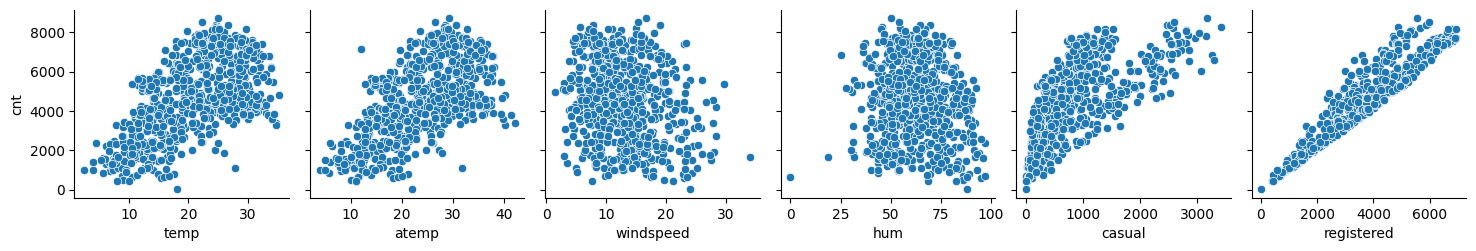

In [27]:
#doing a pair plot to see the general effect of continuous variables on the target variable
sns.pairplot(data, x_vars=["temp",'atemp', 'windspeed',"hum",'casual','registered'],y_vars=['cnt'])
plt.show()

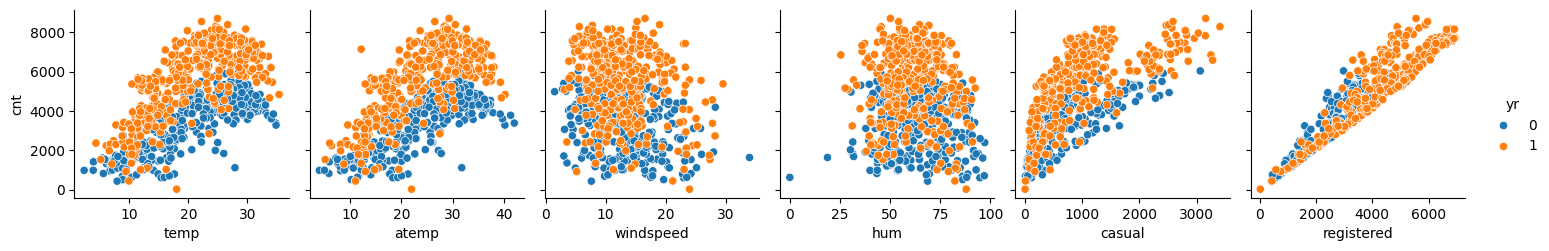

In [28]:
#let's see how the values are distributed across the year variable
sns.pairplot(data, x_vars=["temp",'atemp', 'windspeed',"hum",'casual','registered'],y_vars=['cnt'], hue='yr')
plt.show()

we can observe that the rentals have generally increased in 2019 from 2018

#### Feature selection / dropping 
Let us see what continuous variables (features) are stronly correlated

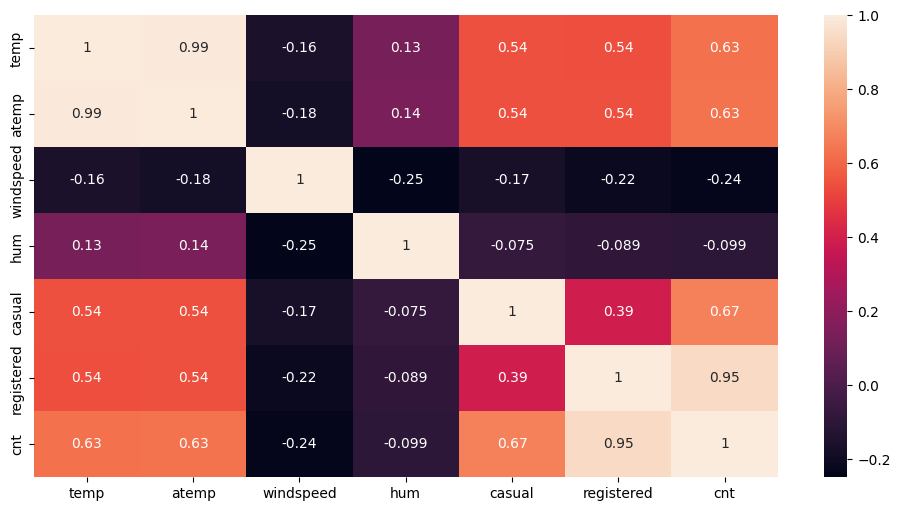

In [29]:
plt.figure(figsize = (12,6))
sns.heatmap(data[["temp",'atemp', 'windspeed',"hum",'casual','registered','cnt']].corr(),annot =True)
plt.show()

* temp and atemp are strongly correlated. atemp can be dropped.
* humidity has very weak correlation with the 'cnt', therefore we can drop that as well
* whether a rider is casual or registered has no effect on the target variable, and also registered has strong correlation with the target variable. therefore casual and registered can also be dropped. 

In [30]:
data = data.drop(['atemp','casual','registered'],axis =1)

In [31]:
data.groupby(['Clear', 'Mist','Light','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)


Clear  Mist  Light  summer  fall  winter
1      0     0      0       1     0         5878.257353
                    1       0     0         5548.548673
0      1     0      0       1     0         5222.479167
1      0     0      0       0     1         5043.563107
0      1     0      0       0     1         4654.000000
                    1       0     0         4236.705882
1      0     0      0       0     0         2811.135135
0      0     1      0       1     0         2751.750000
       1     0      0       0     0         2365.215385
       0     1      0       0     1         1961.600000
                    1       0     0         1169.000000
                    0       0     0          934.750000
Name: cnt, dtype: float64

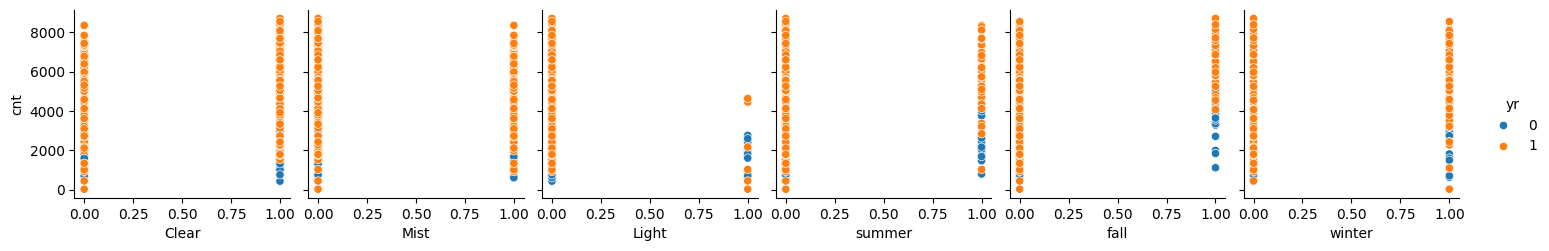

In [32]:
sns.pairplot(data,x_vars =['Clear', 'Mist','Light','summer','fall','winter'],y_vars='cnt',hue ='yr')
plt.show()

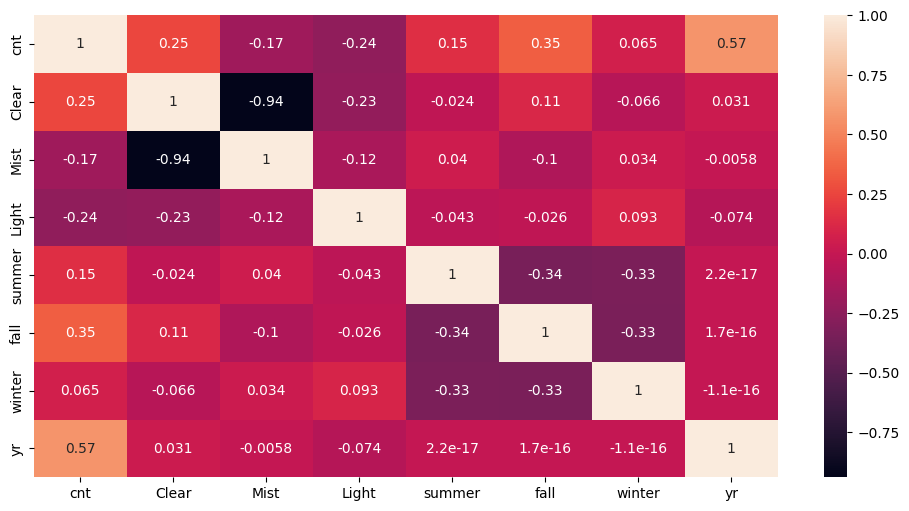

In [33]:
plt.figure(figsize = (12,6))
sns.heatmap(data[['cnt','Clear', 'Mist','Light','summer','fall','winter','yr']].corr(),annot =True)
plt.show()

In [34]:
data.groupby(['summer','fall','winter','Feb','March','April','May','June', \
             'July' ,'Aug','Sep','Oct','Nov','Dec'])['cnt'].mean().sort_values(ascending = False)

summer  fall  winter  Feb  March  April  May  June  July  Aug  Sep  Oct  Nov  Dec
0       0     1       0    0      0      0    0     0     0    1    0    0    0      6024.500000
1       0     0       0    0      0      0    1     0     0    0    0    0    0      5773.850000
0       1     0       0    0      0      0    1     0     0    0    0    0    0      5769.400000
                                              0     0     0    1    0    0    0      5672.704545
                                                          1    0    0    0    0      5664.419355
                                                    1     0    0    0    0    0      5563.677419
1       0     0       0    0      0      1    0     0     0    0    0    0    0      5349.774194
0       0     1       0    0      0      0    0     0     0    0    1    0    0      5199.225806
1       0     0       0    0      1      0    0     0     0    0    0    0    0      4484.900000
0       0     1       0    0      0      0   

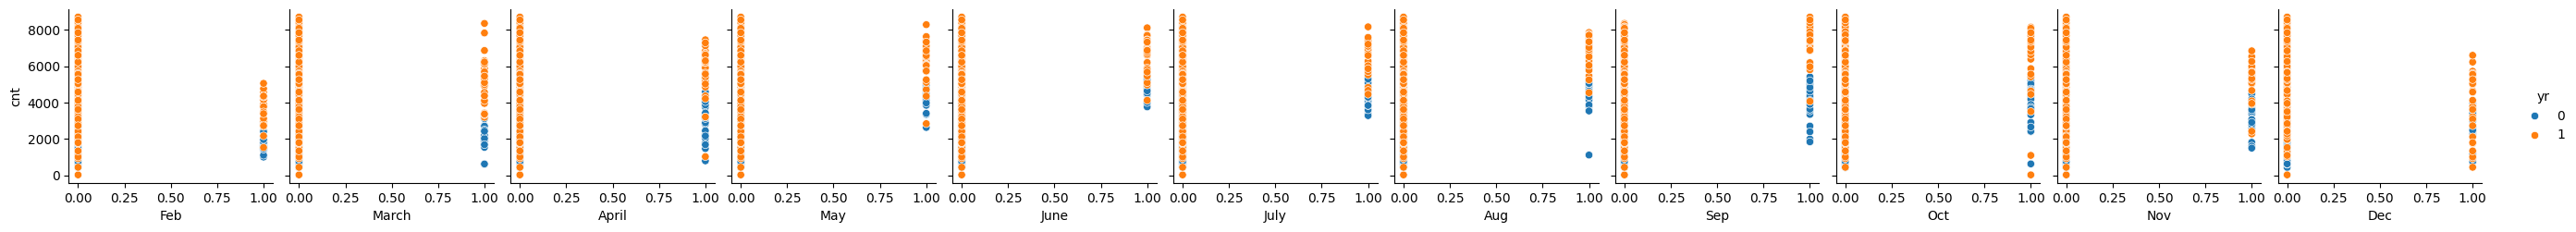

In [35]:
sns.pairplot(data,x_vars =['Feb','March','April','May','June','July' ,'Aug','Sep','Oct','Nov','Dec'],y_vars='cnt',hue ='yr')
plt.show()

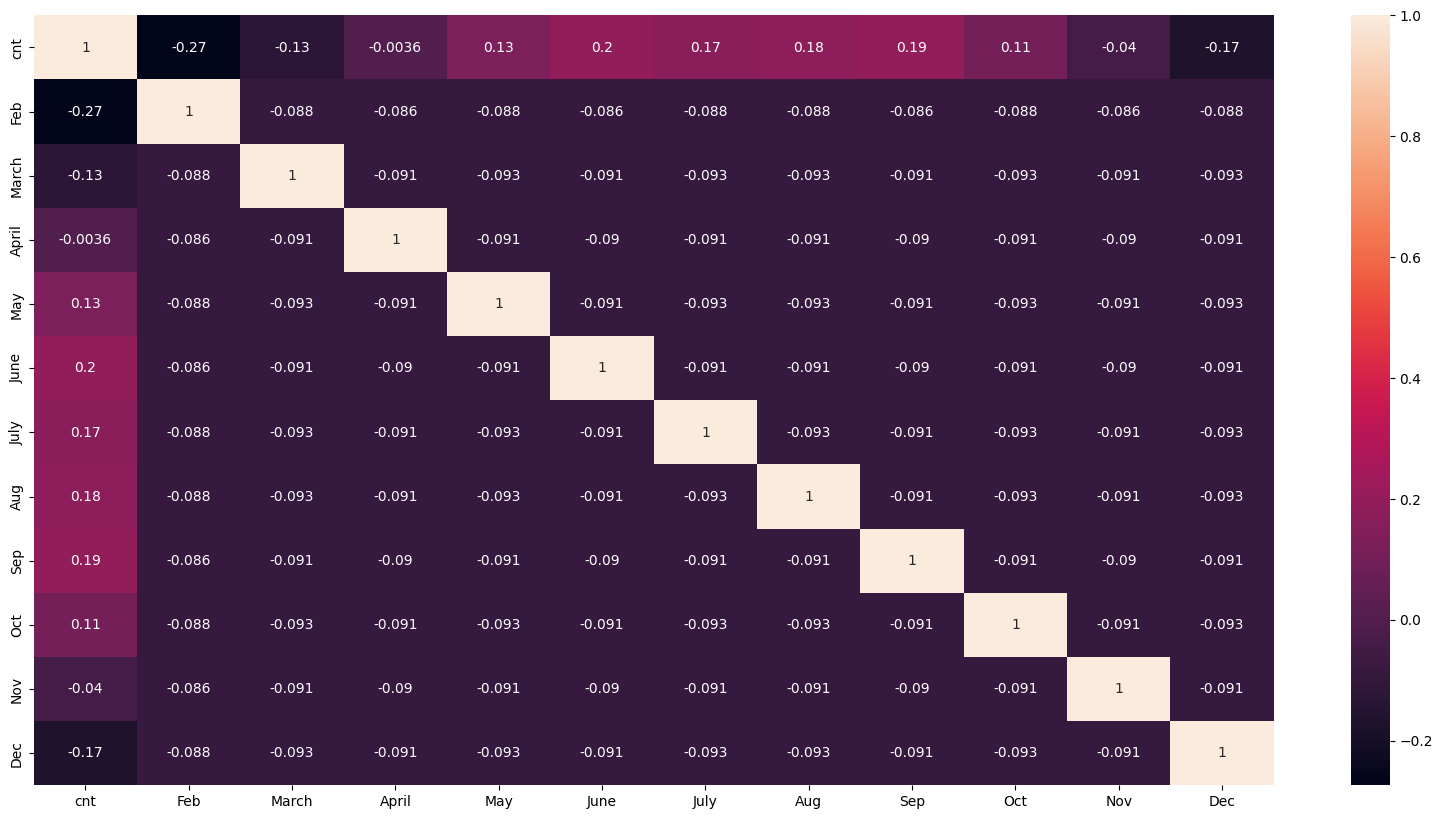

In [36]:
plt.figure(figsize = (20,10))
sns.heatmap(data[['cnt','Feb','March','April','May','June','July' ,'Aug','Sep','Oct','Nov','Dec']].corr(),annot = True)
plt.show()

In [37]:
data.groupby(['holiday', 'workingday','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)


holiday  workingday  summer  fall  winter
0        1           0       1     0         5718.114504
1        0           0       1     0         5707.750000
0        0           0       1     0         5457.075472
                     1       0     0         5160.365385
         1           1       0     0         4926.664062
1        0           1       0     0         4909.250000
0        1           0       0     1         4785.611570
         0           0       0     1         4674.549020
1        0           0       0     1         4025.333333
0        1           0       0     0         2788.495798
         0           0       0     0         2330.888889
1        0           0       0     0         1687.857143
Name: cnt, dtype: float64

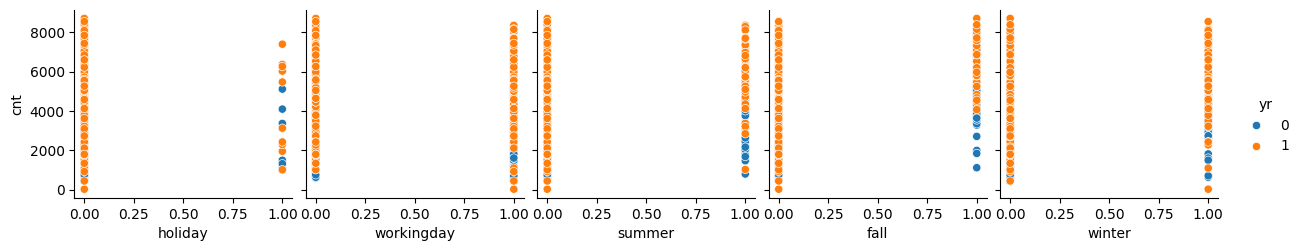

In [38]:
sns.pairplot(data,x_vars =['holiday', 'workingday','summer','fall','winter'],y_vars='cnt',hue ='yr')
plt.show()

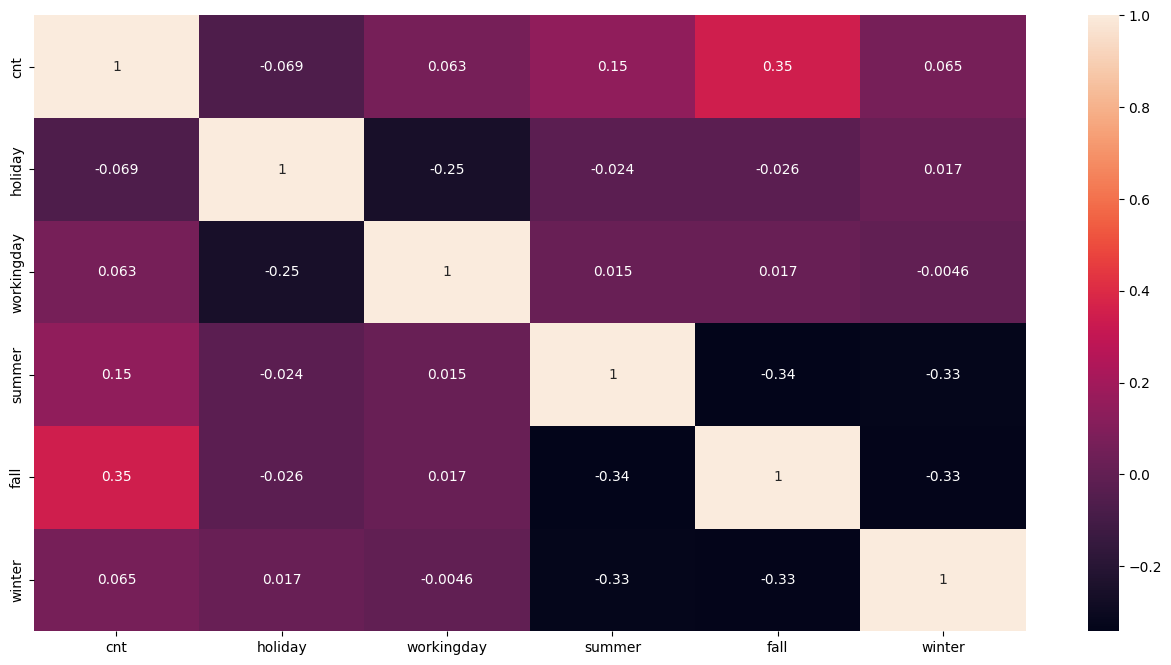

In [39]:
plt.figure(figsize = (16,8))
sns.heatmap(data[['cnt','holiday', 'workingday','summer','fall','winter']].corr(),annot = True)
plt.show()

* Generally speaking, 2019 has seen more rentals than 2018.
* Weekdays see a lot of rentals, probably because more people use it for commute.
* holidays see very less rentals
* Weather situation clearly influences the business. More rentals are taken on a clear day for good weather.

#### Building the Model

#### Creating train and test data

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
df_train,df_test = train_test_split(data,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Scaling the data
* Scale down the data to fit everything between 0.0 and 1.0

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

#variables that need to be scaled
num_vars = ['temp', 'windspeed','hum','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513499,0.224421,0.0,0.356420,0.518638,0.684710,1.0
summer,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0
fall,510.0,0.262745,0.440557,0.0,0.000000,0.000000,1.000000,1.0
winter,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0


In [44]:
#the max of all values is now 1.0. scaling successful.

In [45]:
# Preparation of Training Dataset
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
y_train.sample(5)

(510, 29)


62     0.221123
484    0.638518
374    0.411413
482    0.482973
375    0.247929
Name: cnt, dtype: float64

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
#Recursive Feature elimination
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 2),
 ('winter', True, 1),
 ('Feb', False, 7),
 ('March', False, 3),
 ('April', False, 6),
 ('May', False, 4),
 ('June', False, 5),
 ('July', False, 8),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 9),
 ('Dec', False, 10),
 ('Mon', False, 11),
 ('Tue', False, 12),
 ('Wed', False, 14),
 ('Thu', False, 15),
 ('Fri', False, 13),
 ('Sat', True, 1),
 ('Clear', True, 1),
 ('Mist', True, 1),
 ('Light', True, 1)]

In [49]:
# RFE Selected Features
selected = X_train.columns[rfe.support_]
selected

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Sep', 'Oct', 'Sat', 'Clear', 'Mist', 'Light'],
      dtype='object')

In [50]:
# RFE rejected
X_train.columns[~(rfe.support_)]

Index(['fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Nov', 'Dec',
       'Mon', 'Tue', 'Wed', 'Thu', 'Fri'],
      dtype='object')

In [51]:
import statsmodels.api as sm

#### Using statsmodel to build model

In [52]:
X_train_sel = X_train[selected]

X_train_sel = sm.add_constant(X_train_sel)

lm = sm.OLS(y_train, X_train_sel).fit()


lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.70e-192
Time:                        11:17:57   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0701      0.025      2.765      0.006       0.020       0.120
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0442      0.012      3.829      0.000       0.022       0.067
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
Aug            0.0557      0.016      3.457      0.001       0.024       0.087
Sep            0.1252      0.016      7.757      0.000       0.093       0.157
Oct            0.0385      0.017      2.230      0.026       0.005       0.072
Sat            0.0527      0.015      3.627      0.000       0.024       0.081
Clear          0.1246      0.009     14.641      0.000       0.108       0.141
Mist           0.0679      0.011      5.937      0.000       0.045       0.090
Light         -0.1224      0.022     -5.604      0.000      -0.165      -0.079
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                     2.34e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.04e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
#checking for VIF since statistics indicaate that there are multicollinearity problems
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train_sel.columns
vif['VIF'] = [variance_inflation_factor(X_train_sel.values,i) for i in range(X_train_sel.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

/Users/raghu11188/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/raghu11188/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
13,Clear,inf
14,Mist,inf
15,Light,inf
3,workingday,1.88
5,hum,1.87
12,Sat,1.79
8,winter,1.71
4,temp,1.59
11,Oct,1.49
9,Aug,1.46


In [55]:
#dropping Clear since it has an infinite VIF value
X_train_sel = X_train_sel.drop('Clear',axis=1)
X_train_sel.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer', 'winter', 'Aug', 'Sep', 'Oct', 'Sat', 'Mist', 'Light'],
      dtype='object')

In [56]:
#rebuilding model
X_train_sel2 = sm.add_constant(X_train_sel)
lr = sm.OLS(y_train, X_train_sel2)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.70e-192
Time:                        11:17:57   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1948      0.029      6.769      0.000       0.138       0.251
yr             0.2292      0.008     28.712      0.000       0.214       0.245
holiday       -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0442      0.012      3.829      0.000       0.022       0.067
temp           0.5309      0.022     24.146      0.000       0.488       0.574
hum           -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed     -0.1858      0.025     -7.353      0.000      -0.235      -0.136
summer         0.1049      0.011      9.778      0.000       0.084       0.126
winter         0.1349      0.012     11.306      0.000       0.111       0.158
Aug            0.0557      0.016      3.457      0.001       0.024       0.087
Sep            0.1252      0.016      7.757      0.000       0.093       0.157
Oct            0.0385      0.017      2.230      0.026       0.005       0.072
Sat            0.0527      0.015      3.627      0.000       0.024       0.081
Mist          -0.0568      0.010     -5.482      0.000      -0.077      -0.036
Light         -0.2470      0.026     -9.484      0.000      -0.298      -0.196
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#checking VIF scores again
vif = pd.DataFrame()
vif['Features'] = X_train_sel.columns
vif['VIF'] = [variance_inflation_factor(X_train_sel.values,i) for i in range(X_train_sel.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,53.47
3,workingday,1.88
5,hum,1.87
12,Sat,1.79
8,winter,1.71
4,temp,1.59
13,Mist,1.56
11,Oct,1.49
9,Aug,1.46
7,summer,1.38


* features are statistically significant since p-values are less than 0.05
* r-squared value is 0.848 = 84.8% which is good
* f-statistic is very low, which is good
* Model is overall a good fit. saul goodman.

#### Check for Normality and Patterns in residuals

/var/folders/ll/f75nk27d1696hhl09jtz5tvr0000gn/T/ipykernel_60730/206724162.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


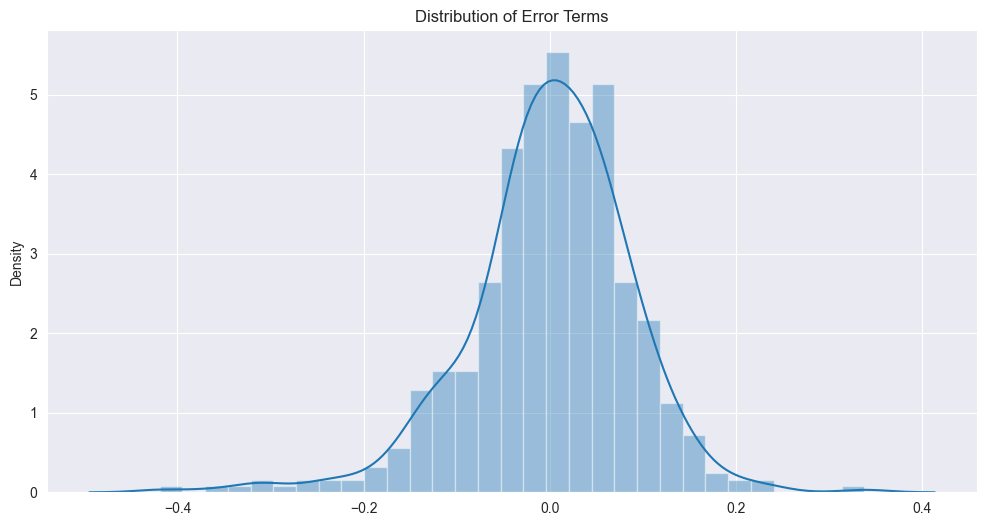

In [58]:
y_train_pred = lr_model.predict(X_train_sel2)
res = (y_train - y_train_pred)

# Ploting of Residuals
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

* normal distribution of errors and no pattern observed in errors

#### Evaluating the model

In [59]:
num_vars = ['temp', 'windspeed',"hum",'cnt']

df_test[num_vars]=scaler.transform(df_test[num_vars])

y_test = df_test.pop('cnt')
X_test = df_test
X_test_sel = sm.add_constant(X_test)
X_test_sel.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,...,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Clear,Mist,Light
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,1,0,...,0,1,0,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.610133,0.153728,1,0,0,...,0,0,0,1,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,0,0,0,0,1,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,1,0,...,0,0,0,1,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [60]:
#Drop the features that were eliminated during training
X_test_sel = X_test_sel.drop(['fall', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Nov', 'Dec', \
       'Mon', 'Tue', 'Wed', 'Thu', 'Fri','Clear'],axis=1)

# predict the count based on test data
y_test_pred = lr_model.predict(X_test_sel)

y_test_pred.sample(5)

360    0.165523
203    0.646595
685    0.636577
363    0.257213
69     0.162006
dtype: float64

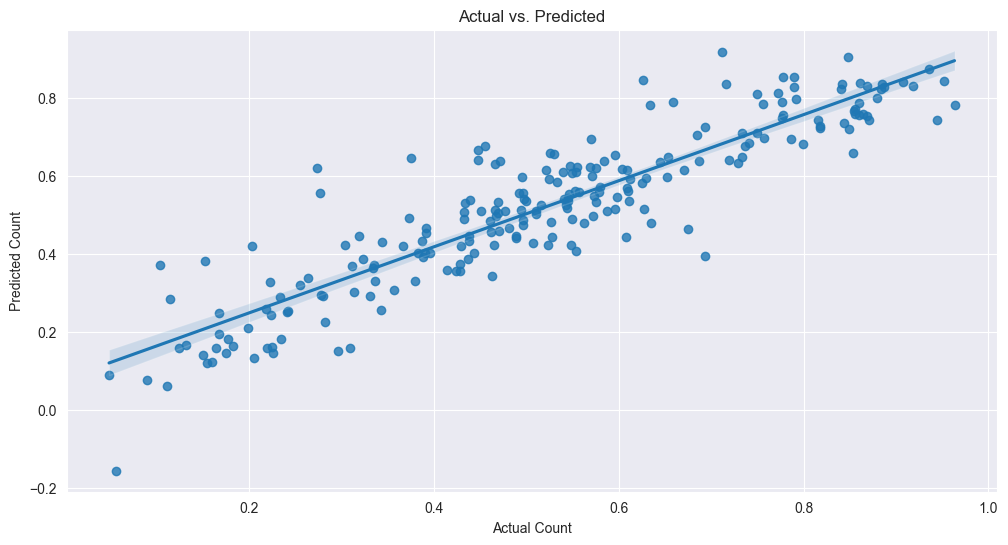

In [61]:


plt.figure(figsize = (12,6))
# sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.show()

In [62]:
##linear relation between actual and predicted count

#### Model Evaluation

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_test,y_test_pred)

0.8149002944843475

* accuracy of the model based on the y-score is 81.4%